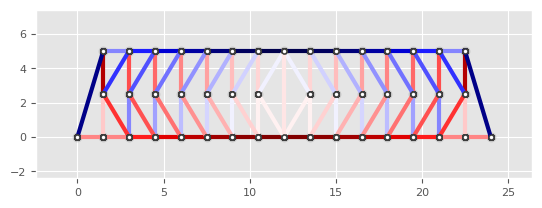

In [3]:
import numpy as np
from analisis_cerchas import calc_esfuerzos_int,vis_esfuerzos
from funciones_cerchas import warren_bridge_data,pratt_bridge_data,howe_bridge_data,double_warren_bridge_data,x_bridge_data,k_bridge_data
from plane_trusses import analysis

data = k_bridge_data(largo=24.0, alto=5, n=8, seccion=0.02, young=200e9, carga_total=400e3)
disp = analysis(data)
esfuerzos = calc_esfuerzos_int(data['nodes'], data['elements'], data['mats'], disp)
vis_esfuerzos(data['nodes'], data['elements'], esfuerzos)